<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Independent Practice

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Walmart Sales Data

For this independent practice, we'll analyze Walmart's weekly sales data over a two-year period from 2010 to 2012.

The data set is again separated by store and department, but we'll focus on analyzing one store for simplicity.

The data include:

* `Store`: The store number.
* `Dept`: The department number.
* `Date`: The week.
* `Weekly_Sales`: Sales for the given department in the given store.
* `IsHoliday`: Whether the week is a special holiday week.

### 1) Preprocess the data using Pandas.

* **Load the data.**
* **Convert the `Date` column to a `datetime` object.**
* **Set `Date` as the index of the DataFrame.**

In [2]:
walmart = pd.read_csv('data/train.csv')

In [3]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
walmart['Date'] = pd.to_datetime(walmart['Date'])

In [6]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [7]:
walmart.set_index('Date', inplace=True)

In [9]:
walmart1 = walmart[walmart.Store == 1]

### 2) Filter the DataFrame to Store 1 sales and aggregate over departments to compute the total weekly sales per store. Store this in a new DataFrame.

In [15]:
walmart1

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False
2010-03-12,1,1,21043.39,False
2010-03-19,1,1,22136.64,False
2010-03-26,1,1,26229.21,False
2010-04-02,1,1,57258.43,False


In [13]:
walmart1_sales = walmart1.groupby('Date').sum()

In [16]:
walmart1_sales

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,73,3184,1643690.90,0.0
2010-02-12,72,3137,1641957.44,72.0
2010-02-19,73,3184,1611968.17,0.0
2010-02-26,72,3137,1409727.59,0.0
2010-03-05,73,3215,1554806.68,0.0
2010-03-12,73,3184,1439541.59,0.0
2010-03-19,72,3137,1472515.79,0.0
2010-03-26,72,3137,1404429.92,0.0
2010-04-02,72,3137,1594968.28,0.0


### 3) Plot the rolling mean for `Weekly_Sales`. What general trends do you observe?

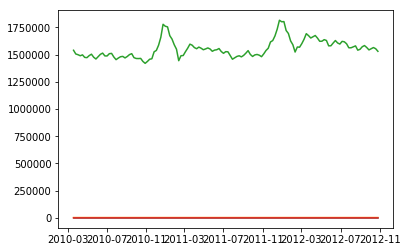

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(walmart1_sales.rolling(window=7).mean())

### 4) Compute the `1`, `13`, and `52` autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [24]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ValueError: x must be 1d. Got 2 dims.

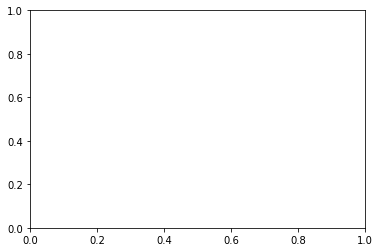

In [26]:
plot_acf(walmart1_sales, lags =1)

### 5) Create a decomposition plot for the Store 1 sales data. 

### 6) Based on the analyses above, what can we deduce about this time series?